<a href="https://colab.research.google.com/github/prachi-lad17/car-selling-price-prediction/blob/master/Retention_Study_Finding_out_which_employee_may_quit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Retention Study - Finding out which employee may quit**

* Here, At the first we imported the hr data which includes basic information about employees and did lil bit of statistic summerization on the dataset.
* In industry we always have to work on couple of datasets for one project by joining or grouping them.
* So next we imported another necessary dataset which inludes the information of employees satisfaction.
* Then merge two datasets with employee id.
* checking for NA's and replacing with mean.
* Visualization - plotting correlation plot using seaborn
* Preparing dataset for ML - 
1. Hot encoding-making a seperate column for each category
2. Splitting 
3. Standardization - StandardScalar method will make each variable to be equally weighted by ML model.
* Training Logistics regression model
* Evaluating logistic regression model
* Training Random Forest model
* Evaluating RF model
* Building a deep learning model using tensorflow and keras

**Step 1 - Loading necessary libraries and datasets.**

In [ ]:
### Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
### Importing dataset.

#hr_data = pd.read_csv("F:/Data_science/UDEMY/datasets_datascienceforbusiness/datascienceforbusiness-master/hr_data.csv")

## Importing online dataset
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/hr_data.csv"
hr_data = pd.read_csv(file_name)

In [ ]:
# To view first 5 records we use .head()
hr_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
# To view last 5 records we use .tail()
hr_data.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low
14998,87684,2,158,3,0,1,0,support,low


In [ ]:
# To get information about data
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
# To get data types of variables
hr_data.dtypes


employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

In [ ]:
"""If there are many variables in dataset and it is tidious to find out which variables are categorical by checking it 
manually then we can find out the categorical variables by below code."""

hr_data.select_dtypes(exclude=['int64','float64']).columns

# """ department and salary are the categorical variables."""

Index(['department', 'salary'], dtype='object')

In [ ]:
# Display values in categorical columns by .unique()

print(hr_data['department'].unique())
print()
print(hr_data['salary'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

['low' 'medium' 'high']


In [ ]:
## Size of dataset

hr_data.shape

(14999, 9)

## **Step 2 - Loading evaluation and employee satisfaction dataset.**

In [ ]:
### Importing excel file
# emp_satisfaction = pd.read_excel(r"F:\Data_science\UDEMY\datasets_datascienceforbusiness\datascienceforbusiness-master\employee_satisfaction_evaluation.xlsx")

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
emp_satisfaction = pd.read_excel(file_name)

In [ ]:
emp_satisfaction.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [ ]:
emp_satisfaction.tail()

,EMPLOYEE #,satisfaction_level,last_evaluation
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96
14998,87684,0.37,0.52


In [ ]:
emp_satisfaction.shape

(14999, 3)

In [ ]:
hr_data.shape

### By checking the shape we know that both dataset have same records hence we can join datasets easily.

(14999, 9)

## **Step 3 - Merge and join datasets (table)**

In [ ]:
emp_satisfaction.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [ ]:
hr_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
main_df = hr_data.set_index('employee_id').join(emp_satisfaction.set_index('EMPLOYEE #'))
main_df = main_df.reset_index()  ### Removing the extra row in the col titles
main_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


## **Step 4 - EDA on main_df**

In [ ]:
main_df.tail()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96
14998,87684,2,158,3,0,1,0,support,low,0.37,0.52


In [ ]:
### Checking summary statistics

main_df.describe(include="all")

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999,14972.000000,14972.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316,NaN,NaN
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN,0.820000,0.870000


In [ ]:
### checking if there are any missing values or null values

main_df.isnull().sum().sort_values(ascending=False)

last_evaluation          27
satisfaction_level       27
salary                    0
department                0
promotion_last_5years     0
left                      0
Work_accident             0
time_spend_company        0
average_montly_hours      0
number_project            0
employee_id               0
dtype: int64

In [ ]:
## checking what kind of missing values are there in last two columns

main_df[main_df['last_evaluation'].isnull()]

### Its NaN - not a number

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,1,1,1,sales,low,NaN,NaN
33,1230,2,140,3,0,1,0,hr,low,NaN,NaN
53,1340,2,132,3,0,1,0,support,low,NaN,NaN
72,22316,2,149,3,0,1,0,product_mng,high,NaN,NaN
92,1581,2,143,3,0,1,0,sales,low,NaN,NaN
107,17376,2,148,3,0,1,0,accounting,medium,NaN,NaN
120,1739,4,158,4,1,1,0,technical,low,NaN,NaN
137,1847,2,129,3,0,1,0,management,low,NaN,NaN
175,32923,4,164,2,0,1,0,sales,low,NaN,NaN
191,2160,4,226,6,1,1,0,technical,medium,0.92,NaN


In [ ]:
### Filling the missing values with mean for numerical variables.

print(main_df['last_evaluation'].mean())
print(main_df['satisfaction_level'].mean())

### Since both of them are numerical we will fill with mean()

main_df.fillna(main_df['last_evaluation'].mean(),inplace=True)

main_df.fillna(main_df['satisfaction_level'].mean(),inplace=True)

0.716124766230287
0.6128299492385795


In [ ]:
main_df.last_evaluation.isnull().sum()

0

In [ ]:
main_df.satisfaction_level.isnull().sum()

0

In [ ]:
### Checking for specific observation

main_df[main_df['employee_id']==4150]

#OR by .loc
# main_df.loc[main_df['employee_id'] == 3794]

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
543,4150,5,237,5,0,1,0,sales,medium,0.89,0.716125


In [ ]:
### Removing employee ID
"""## employee_id variable is not influencing our dataset in actul, it's just like employee name. Hence we will remove it.
"""

main_df = main_df.drop(columns="employee_id")

In [ ]:
main_df_final = main_df

In [ ]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


## **Groupby - we can group all the departments of company and see which department have done much projects or such kind of questions**

In [ ]:
""" IN result we can say that it shows the work or tasks done by each department by group ."""
main_df_final.groupby(main_df_final.department).sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.276125,879.452250
RandD,3033,158030,2650,134,121,27,487.800000,560.446125
accounting,2934,154292,2702,96,204,14,446.786125,550.706125
hr,2701,146828,2480,89,215,15,442.742250,524.006125
management,2432,126787,2711,103,91,69,391.972250,456.234499
marketing,3164,171073,3063,138,203,43,530.726125,613.946125
product_mng,3434,180369,3135,132,198,0,559.402250,644.662250
sales,15634,831773,14631,587,1014,100,2544.502873,2938.236749
support,8479,447490,7563,345,555,20,1378.218374,1611.534499


In [ ]:
main_df_final.groupby(main_df_final.department).mean()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617992,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582511,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.599110,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.622178,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618562,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.620180,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614614,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618312,0.722985


In [ ]:
main_df_final['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
### Checking how many employees have left and not.

main_df_final['left'].value_counts()

### Here,  0 11428 no - not left 
###        1 3571 yes - left

0    11428
1     3571
Name: left, dtype: int64

## **Visualization** 

#### **Plotting correlation matrix**

No handles with labels found to put in legend.


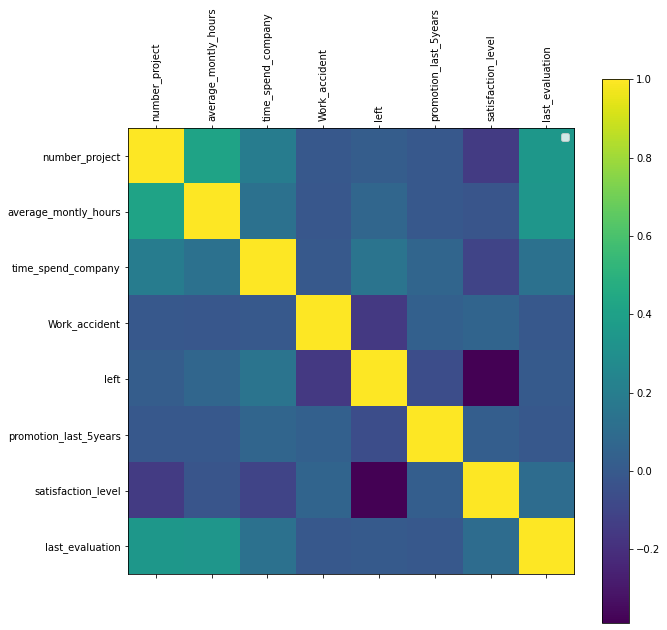

In [ ]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.legend()
    cax = ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr.columns)), corr.columns)
    
plot_corr(main_df_final)

In [ ]:
""" By plotting, we can see-
* If we consider 'left' variable, then 'satisfaction_level' is highly correlated with 'left' by which we can say that 
satisfaction level makes the impact on ppl for leaving the job. 
* Work accidents - is also having slightly higher impact on the employees with the decision of leaving.
* Time spend company - also affected on leaving rate. """

" By plotting, we can see-\n* If we consider 'left' variable, then 'satisfaction_level' is highly correlated with 'left' by which we can say that \nsatisfaction level makes the impact on ppl for leaving the job. \n* Work accidents - is also having slightly higher impact on the employees with the decision of leaving.\n* Time spend company - also affected on leaving rate. "

### **Preparing our dataset for Machine Learning.**

In [ ]:
"""Here department variable is categorical is having categories like sales, hr, IT. It's not in numeric, hence computer 
will not be able to understand, hence we need to do encoding."""

### Performing one hot encoding on categorical data

categorical = ['department','salary']
main_df_final = pd.get_dummies(main_df_final,columns=categorical,drop_first=True)
main_df_final.head()

### It will create diff column for each category in categorical variable

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
main_df_final.shape
## here we have 19 columns now.

(14999, 19)

In [ ]:
### Checking how many employees in the dataset have left

len(main_df_final.loc[main_df_final['left']==1])

3571

In [ ]:
main_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   number_project          14999 non-null  int64  
 1   average_montly_hours    14999 non-null  int64  
 2   time_spend_company      14999 non-null  int64  
 3   Work_accident           14999 non-null  int64  
 4   left                    14999 non-null  int64  
 5   promotion_last_5years   14999 non-null  int64  
 6   satisfaction_level      14999 non-null  float64
 7   last_evaluation         14999 non-null  float64
 8   department_RandD        14999 non-null  uint8  
 9   department_accounting   14999 non-null  uint8  
 10  department_hr           14999 non-null  uint8  
 11  department_management   14999 non-null  uint8  
 12  department_marketing    14999 non-null  uint8  
 13  department_product_mng  14999 non-null  uint8  
 14  department_sales        14999 non-null

### **splitting and standardizing dataset for ML**

In [ ]:
from sklearn.model_selection import train_test_split

# We remove our label values from train data
X = main_df_final.drop(['left'],axis=1).values

# We assigned our label variable to test data
Y = main_df_final['left'].values

In [ ]:
## Split X and Y into 70:30 ratio Train:Test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

### **Standardization**

In [ ]:
## Normalizing the data
# Why do we need to scale our data?
  # The data is measures in different units which is inconsistant. To make each variable to be equally weighted by a ML
  # classifier we scale our data.  
# We don't scale Y data because it includes label variable which will remain unaffected. That's why we only scale our Xdata
# by scaling data ..data become standard and data do not get skewed by any one data point.
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# fit(raw_documents[, y]): Learn a vocabulary dictionary of all tokens in the raw documents.
# fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return term-document 
  # matrix. This is equivalent to fit followed by the transform, but more efficiently implemented.


In [ ]:
X_train

array([[-0.65552431,  0.15283757, -0.3394421 , ...,  2.103768  ,
         1.02459028, -0.86710852],
       [-0.65552431, -0.36784437, -1.0266389 , ..., -0.47533758,
         1.02459028, -0.86710852],
       [ 1.78589098, -0.54808043, -0.3394421 , ..., -0.47533758,
        -0.97599989,  1.15325818],
       ...,
       [-0.65552431,  0.09275888, -0.3394421 , ...,  2.103768  ,
        -0.97599989,  1.15325818],
       [ 1.78589098, -1.0887886 , -0.3394421 , ...,  2.103768  ,
        -0.97599989,  1.15325818],
       [ 0.15828079,  0.43320476, -0.3394421 , ..., -0.47533758,
         1.02459028, -0.86710852]])

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.655524,0.152838,-0.339442,-0.41602,-0.153927,0.349552,-0.502285,-0.231033,-0.232174,-0.227813,-0.212350,-0.252658,-0.250089,-0.620116,-0.412390,2.103768,1.02459,-0.867109
1,-0.655524,-0.367844,-1.026639,-0.41602,-0.153927,-0.052867,-1.147955,-0.231033,-0.232174,-0.227813,-0.212350,-0.252658,-0.250089,-0.620116,2.424887,-0.475338,1.02459,-0.867109
2,1.785891,-0.548080,-0.339442,-0.41602,-0.153927,-1.783268,-0.326193,-0.231033,-0.232174,-0.227813,-0.212350,-0.252658,-0.250089,1.612600,-0.412390,-0.475338,-0.97600,1.153258
3,1.785891,-0.047425,0.347755,-0.41602,-0.153927,-1.461333,1.317329,-0.231033,-0.232174,4.389572,-0.212350,-0.252658,-0.250089,-0.620116,-0.412390,-0.475338,-0.97600,1.153258
4,1.785891,1.254280,0.347755,-0.41602,-0.153927,-2.064961,1.434724,-0.231033,-0.232174,-0.227813,4.709204,-0.252658,-0.250089,-0.620116,-0.412390,-0.475338,-0.97600,1.153258


In [ ]:
df_train.describe(include="all")

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04,1.049900e+04
mean,6.101177e-16,2.819812e-16,-2.775505e-16,5.319532e-16,6.272036e-16,2.650684e-14,1.819843e-14,3.242530e-16,-7.228240e-16,8.697575e-18,3.748629e-16,-4.883332e-16,-1.265912e-15,4.654921e-16,1.569899e-15,-6.532646e-16,1.791965e-16,6.572829e-16
std,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00,1.000048e+00
min,-1.469329e+00,-2.110126e+00,-1.026639e+00,-4.160200e-01,-1.539268e-01,-2.105203e+00,-2.087111e+00,-2.310328e-01,-2.321742e-01,-2.278127e-01,-2.123501e-01,-2.526584e-01,-2.500885e-01,-6.201164e-01,-4.123903e-01,-4.753376e-01,-9.759999e-01,-8.671085e-01
25%,-6.555243e-01,-9.085525e-01,-3.394421e-01,-4.160200e-01,-1.539268e-01,-6.967372e-01,-9.131658e-01,-2.310328e-01,-2.321742e-01,-2.278127e-01,-2.123501e-01,-2.526584e-01,-2.500885e-01,-6.201164e-01,-4.123903e-01,-4.753376e-01,-9.759999e-01,-8.671085e-01
50%,1.582808e-01,-7.372261e-03,-3.394421e-01,-4.160200e-01,-1.539268e-01,1.483424e-01,2.598998e-02,-2.310328e-01,-2.321742e-01,-2.278127e-01,-2.123501e-01,-2.526584e-01,-2.500885e-01,-6.201164e-01,-4.123903e-01,-4.753376e-01,-9.759999e-01,-8.671085e-01
75%,9.720859e-01,8.737818e-01,3.477547e-01,-4.160200e-01,-1.539268e-01,8.324545e-01,9.064486e-01,-2.310328e-01,-2.321742e-01,-2.278127e-01,-2.123501e-01,-2.526584e-01,-2.500885e-01,1.612600e+00,-4.123903e-01,-4.753376e-01,1.024590e+00,1.153258e+00
max,2.599696e+00,2.175487e+00,4.470935e+00,2.403731e+00,6.496596e+00,1.556809e+00,1.669513e+00,4.328390e+00,4.307112e+00,4.389572e+00,4.709204e+00,3.957914e+00,3.998584e+00,1.612600e+00,2.424887e+00,2.103768e+00,1.024590e+00,1.153258e+00


## **Training LOGISTIC REGRESSION MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

### creating a model
classifier_model = LogisticRegression()

### passing training data to model
classifier_model.fit(X_train,Y_train)

### predicting values x_test using model and storing the values in y_pred
y_pred = classifier_model.predict(X_test)

### interception and coefficient of model
print(classifier_model.intercept_)
print(classifier_model.coef_)
print()

### printing values for better understanding
print(list(zip(Y_test, y_pred)))

[-1.59568123]
[[-0.39169173  0.20085002  0.39492491 -0.522296   -0.24173961 -1.01318044
   0.13799348 -0.0870686   0.05897235  0.10537934 -0.0250911   0.07037736
   0.02509799  0.10807108  0.12083002  0.12569797  0.96620694  0.7031298 ]]

[(0, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 0), (1, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 0), (1, 0), (0, 0), (0, 1), (0, 0), (0, 0), (1, 0), (1, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1), 

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### creating and printing confusion matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
print(conf_matrix)

### Creating and printing classification report
print("Classification Report: ")
print(classification_report(Y_test,y_pred))


### Creating and printing accuracy score
acc = accuracy_score(Y_test,y_pred)
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred, Y_test)))

[[3187  244]
 [ 674  395]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3431
           1       0.62      0.37      0.46      1069

    accuracy                           0.80      4500
   macro avg       0.72      0.65      0.67      4500
weighted avg       0.78      0.80      0.78      4500

Accuracy 79.60%


## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=100,random_state=10) ## it will built 100 DT in background

#fit the model on the data and predict the values

random_forest_model.fit(X_train,Y_train)

y_pred_rf = random_forest_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### creating and printing confusion matrix
conf_matrix_rf = confusion_matrix(Y_test,y_pred_rf)
print(conf_matrix_rf)

### Creating and printing classification report
print("Classification Report: ")
print(classification_report(Y_test,y_pred_rf))


### Creating and printing accuracy score
acc = accuracy_score(Y_test,y_pred_rf)
print("Accuracy {0:.2f}%".format(100*accuracy_score(y_pred_rf, Y_test)))

[[3424    7]
 [  38 1031]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3431
           1       0.99      0.96      0.98      1069

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500

Accuracy 99.00%


#### If we have been asked that what variable is most influential to make employee left. We can find this by '**feature_importances_**'

In [ ]:
hr_data.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [ ]:
main_df_final.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
main_df_final.drop(['left'],axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
import pandas as pd
feature_importances = pd.DataFrame(random_forest_model.feature_importances_,
                                   index = pd.DataFrame(X_train).columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

feature_importances

### Here we can see that index of 5 variable is showing greater impact on the employee retention following by index 0 and 2 and then 1
### Index 5 variable is 'Satisfaction level' following by 'Number of projects' and then 'time spend in company'.

,importance
5,0.312513
0,0.186923
2,0.185075
1,0.150967
6,0.120612
3,0.009342
16,0.008720
15,0.003810
17,0.003658
13,0.003456


# **Deep Learning**

In [ ]:
# Use the newest version of TensorFlow 2.0
%tensorflow_version 2.x 

In [ ]:
# If you wish to use Tensorflow 1.X run the following line and then restart runtime
# %tensorflow_version 1.x 
# You'll need to change your import statements from tensorflow.keras to keras
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(9, kernel_initializer = "uniform", activation = "relu", input_dim=18))
model.add(Dense(1, kernel_initializer = "uniform", activation = "sigmoid"))

model.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

In [ ]:
# Display Model Summary and Show Parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Start Training Our Classifier 
batch_size = 10
epochs = 25

history = model.fit(X_train,
                    Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 3s 2ms/step - loss: 0.5343 - accuracy: 0.7675 - val_loss: 0.3161 - val_accuracy: 0.8269
Epoch 2/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.3020 - accuracy: 0.8396 - val_loss: 0.2502 - val_accuracy: 0.8589
Epoch 3/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2296 - accuracy: 0.8850 - val_loss: 0.2173 - val_accuracy: 0.9504
Epoch 4/25
1050/1050 [==============================] - 2s 1ms/step - loss: 0.2123 - accuracy: 0.9472 - val_loss: 0.1995 - val_accuracy: 0.9562
Epoch 5/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1996 - accuracy: 0.9511 - val_loss: 0.1887 - val_accuracy: 0.9571
Epoch 6/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1899 - accuracy: 0.9483 - val_loss: 0.1821 - val_accuracy: 0.9527
Epoch 7/25
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1739 - accuracy: 0.9570 - val_loss: 0.1788 - val_accuracy:

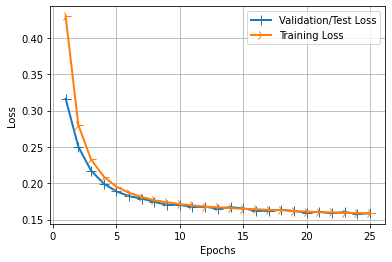

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

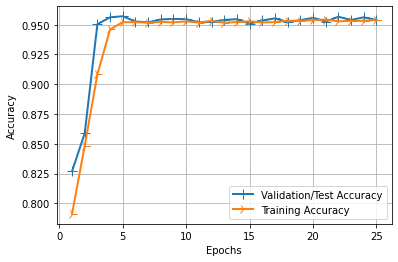

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# **Displaying the Classification Report and Confusion Matrixt**

In [ ]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[3325  106]
 [ 101  968]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3431
           1       0.90      0.91      0.90      1069

    accuracy                           0.95      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500



# **Let's a Deeper Model**

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model2 = Sequential()

# Hidden Layer 1
model2.add(Dense(270, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 1
model2.add(Dense(180, activation='relu', input_dim=18, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.3, noise_shape=None, seed=None))

# Hidden Layer 2
model2.add(Dense(90, activation = 'relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))

model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 270)               5130      
_________________________________________________________________
dropout (Dropout)            (None, 270)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               48780     
_________________________________________________________________
dropout_1 (Dropout)          (None, 180)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 91        
Total params: 70,291
Trainable params: 70,291
Non-trainable params: 0
__________________________________________________

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Training our Deeper Model**

In [ ]:
batch_size = 10
epochs = 25

history = model2.fit(X_train,
                    Y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, Y_test))

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
1050/1050 [==============================] - 4s 3ms/step - loss: 1.3081 - accuracy: 0.8559 - val_loss: 0.2805 - val_accuracy: 0.9447
Epoch 2/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2832 - accuracy: 0.9391 - val_loss: 0.2556 - val_accuracy: 0.9431
Epoch 3/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2587 - accuracy: 0.9432 - val_loss: 0.2535 - val_accuracy: 0.9393
Epoch 4/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2523 - accuracy: 0.9450 - val_loss: 0.2295 - val_accuracy: 0.9489
Epoch 5/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2485 - accuracy: 0.9415 - val_loss: 0.2216 - val_accuracy: 0.9564
Epoch 6/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2439 - accuracy: 0.9416 - val_loss: 0.2236 - val_accuracy: 0.9529
Epoch 7/25
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2442 - accuracy: 0.9438 - val_loss: 0.2254 - val_accuracy:

In [ ]:
predictions = model2.predict(X_test)
predictions = (predictions > 0.5)

print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[3373   58]
 [ 116  953]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3431
           1       0.94      0.89      0.92      1069

    accuracy                           0.96      4500
   macro avg       0.95      0.94      0.95      4500
weighted avg       0.96      0.96      0.96      4500

